# Think Bayes

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import numpy as np
import pandas as pd

from scipy.stats import poisson, norm

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite, Joint

import thinkbayes2
import thinkplot

import pymc3 as pm

In [5]:
data=np.array([[42.7, 40.4, 16.8, 0.3, 0.3, 0.3], 
      [45.0, 42.6, 12.5, 0.3, 0.4, 0.3], 
      [73.2, 13.8, 13.1, 0.4, 0.3, 0.3], 
      [62.2, 27.0, 10.8, 0.3, 0.3, 0.3], 
      [54.2, 35.7, 10.2, 0.4, 0.4, 0.3], 
      [58.5, 33.9, 7.6, 0.4,0.4, 0.4], 
      [62.3, 33.7, 4.0, 0.3, 0.3, 0.3]]);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigmaY, sigmaCu, sigmaBa, muY, muCu, muBa]
Sampling 2 chains: 100%|██████████| 8000/8000 [00:08<00:00, 924.98draws/s] 
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


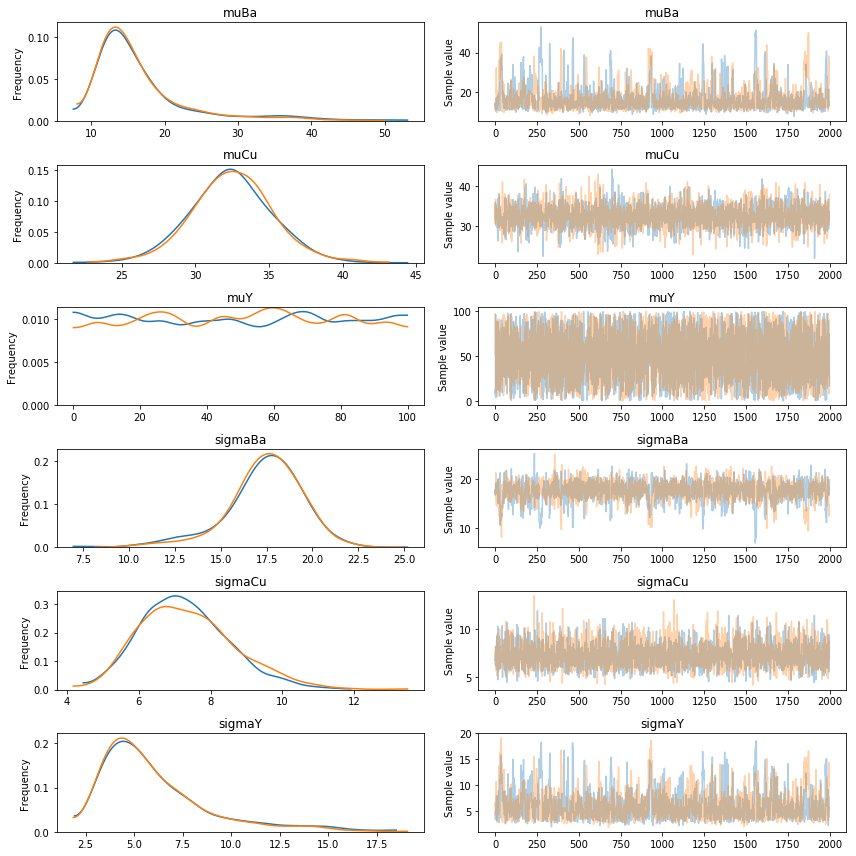

In [18]:
Ba = data[:,0];
Cu = data[:,1];
Y  = data[:,2];
tauBa = data[:,3];
tauCu = data[:,4];
tauY  = data[:,5];

mBa = 137.327;
mCu = 63.546;
mY  = 88.90585;

expect = np.array([2*mBa,3*mCu,mY])/sum([mY,2*mBa,3*mCu])

model = pm.Model()


with model:
    muBa = pm.Uniform("muBa",lower=0,upper=100);
    muCu = pm.Uniform("muCu",lower=0,upper=100);
    muY  = pm.Uniform("muY" ,lower=0,upper=100);
    sigmaBa = pm.HalfNormal("sigmaBa",sd=3);
    sigmaCu = pm.HalfNormal("sigmaCu",sd=3);
    sigmaY  = pm.HalfNormal("sigmaY",sd=3);
    
    percentBa = pm.Normal("pBa",mu=muBa,sd=sigmaBa,observed=Ba)
    percentCu = pm.Normal("pCu",mu=muCu,sd=sigmaCu,observed=Cu)
    percentY = pm.Normal("pY",mu=muBa,sd=sigmaY,observed=Y)
    
    trace = pm.sample(2000, tune=2000)
    
pm.traceplot(trace);